### 生成数据集

In [1]:
import tensorflow as tf

print(tf.__version__)

2.1.0


In [2]:
num_inputs = 2
num_examples = 1000

true_w = [2, -3.4]
true_b = 4.2

X = tf.random.normal(shape=(num_examples,num_inputs),mean=0.0,stddev=1.0)
Y = X[:,0]*true_w[0] + X[:,1]*true_w[1]+true_b
print(X[1])
print(Y.shape)
print(Y[0])

tf.Tensor([-1.1134249 -0.8061136], shape=(2,), dtype=float32)
(1000,)
tf.Tensor(7.1273923, shape=(), dtype=float32)


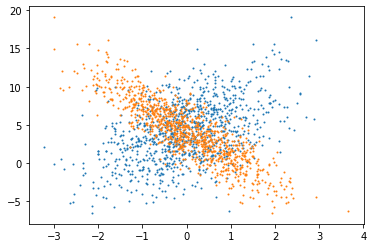

In [3]:
from matplotlib import pyplot as plt

plt.scatter(X[:,0],Y,1)
plt.scatter(X[:,1],Y,1)

### 数据管道Dataset

可以从 Numpy array, Pandas DataFrame, Python generator, csv文件, 文本文件, 文件路径, tfrecords文件等方式构建数据管道。

其中通过Numpy array, Pandas DataFrame, 文件路径构建数据管道是最常用的方法。

通过tfrecords文件方式构建数据管道较为复杂，需要对样本构建tf.Example后压缩成字符串写到tfrecoreds文件，读取后再解析成tf.Example。

但tfrecoreds文件的优点是压缩后文件较小，便于网络传播，加载速度较快。

Dataset包含了非常丰富的数据转换功能。

map: 将转换函数映射到数据集每一个元素。

flat_map: 将转换函数映射到数据集的每一个元素，并将嵌套的Dataset压平。

interleave: 效果类似flat_map,但可以将不同来源的数据夹在一起。

filter: 过滤掉某些元素。

zip: 将两个长度相同的Dataset横向铰合。

concatenate: 将两个Dataset纵向连接。

reduce: 执行归并操作。

batch : 构建批次，每次放一个批次。比原始数据增加一个维度。 其逆操作为unbatch。

padded_batch: 构建批次，类似batch, 但可以填充到相同的形状。

window :构建滑动窗口，返回Dataset of Dataset.

shuffle: 数据顺序洗牌。

repeat: 重复数据若干次，不带参数时，重复无数次。

shard: 采样，从某个位置开始隔固定距离采样一个元素。

take: 采样，从开始位置取前几个元素。



In [4]:
from tensorflow import data as tfdata

batch_size = 10
# 将训练数据的特征和标签组合
dataset = tfdata.Dataset.from_tensor_slices((X, Y))
# 随机读取小批量
dataset = dataset.shuffle(buffer_size=num_examples) 
# batch指定小批量
dataset = dataset.batch(batch_size)
data_iter = iter(dataset)

In [4]:
for X, y in data_iter:
    print(X, y)
    break

tf.Tensor(
[[ 0.88902944 -0.5990862 ]
 [ 0.6652064  -0.9865202 ]
 [ 0.4906078  -1.0222833 ]
 [-0.8214755   1.1266946 ]
 [ 0.37014768  1.048273  ]
 [ 1.4949594  -0.31861055]
 [ 1.3904709   0.4520604 ]
 [ 1.5917462   1.1410431 ]
 [ 0.5664538  -0.83312184]
 [ 1.5472023  -1.0906564 ]], shape=(10, 2), dtype=float32) tf.Tensor(
[ 8.014952   8.884581   8.656979  -1.2737131  1.376167   8.273194
  5.4439363  3.5039456  8.165522  11.002636 ], shape=(10,), dtype=float32)


### 利用keras定义模型



In [5]:
from tensorflow import keras
from tensorflow import initializers as init

model = keras.Sequential()
model.add(keras.layers.Dense(1,kernel_initializer=init.RandomNormal(stddev =0.01)))

In [6]:
from tensorflow import losses

loss = losses.MeanSquaredError()

In [7]:
from tensorflow import optimizers

trainer = optimizers.SGD(learning_rate = 0.03)

In [11]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for (batch, (x, y)) in enumerate(dataset):
        with tf.GradientTape() as tape:
            l = loss(model(x, training=True), y)

        grads = tape.gradient(l, model.trainable_variables)
        trainer.apply_gradients(zip(grads, model.trainable_variables))

    l = loss(model(X), Y)
    print('epoch %d, loss: %f' % (epoch, l))

InvalidArgumentError: Incompatible shapes: [1000] vs. [10] [Op:SquaredDifference]